In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")


/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# O'Neil feedback: look to combine price_target with STDEV, say price_target increases BUT see the difference between low dispersion and high dipersion when price_target increases !!!

# 1) Both avg and median price target moves are informative at all horizons (although profits are not super large)

# 2) Trading on stdev of estimate is not super informative, however at longer horizons, it pays to bet on stocks with high stdev in price target estimates (high disagreement --> extreme optimism & pessimism --> shorting is costly --> so optimism will win out and stock will go up)

# 3) priceTarget moves is most informative, followed by moves in price_target_high, followed by moves in price_target_low



In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# Midpoint Analyst Estimate = pricetargetsmean

### Now, let's trade on earnings increases in price targets
### the times when 'pricetargetsmean' changes
###### Buy when positive change, so when df['pricetargetsmean'].diff(1) > 0
###### Sell when negative change, so when df['pricetargetsmean'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['pricetargetsmean'].diff(1) > 0
# Set Sell_tomorrow>0 when df['pricetargetsmean'].diff(1) < 0


In [3]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetargetsmean'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['pricetargetsmean'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetargetsmean'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  90713
Total number of Sells:  58810
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [4]:
data = cp.trade_on_valid_lags_only(data)


There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  90712
Total number of Sells:  58810


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [5]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  17  problems for buying

There are  16  problems for selling
Total number of Buys:  763468
Total number of Sells:  563026

There are  17  problems for buying

There are  15  problems for selling
Total number of Buys:  661722
Total number of Sells:  475041

There are  12  problems for buying

There are  10  problems for selling
Total number of Buys:  525797
Total number of Sells:  366161

There are  8  problems for buying

There are  3  problems for selling
Total number of Buys:  332595
Total number of Sells:  223440

There are  1  problems for buying

There are  1  problems for selling
Total number of Buys:  90688
Total number of Sells:  58785


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.746
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.93e-07
Time:                        17:42:55   Log-Likelihood:                 13117.
No. Observations:                4984   AIC:                        -2.622e+04
Df Residuals:                    4977   BIC: 

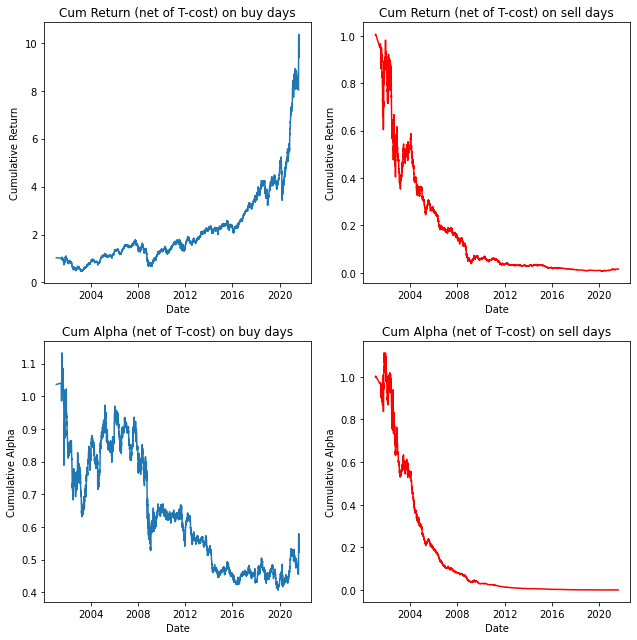

In [6]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.891
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.88e-06
Time:                        17:43:16   Log-Likelihood:                 13734.
No. Observations:                5047   AIC:                        -2.745e+04
Df Residuals:                    5040   BIC: 

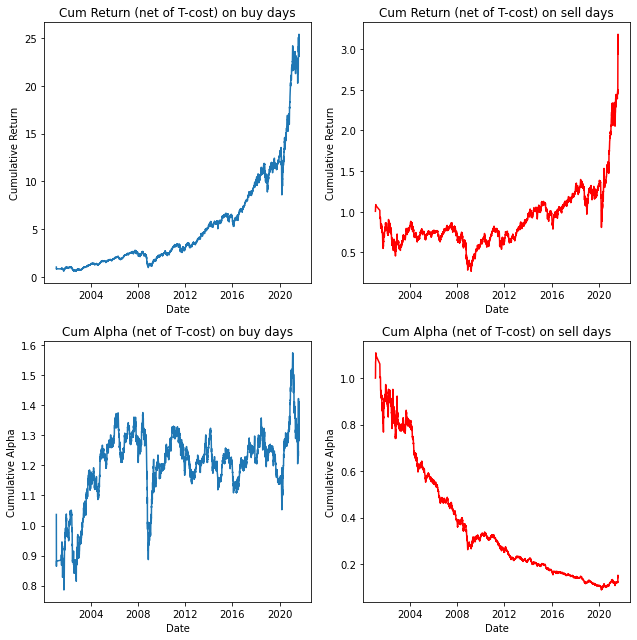

In [7]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.746
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           5.70e-06
Time:                        17:43:41   Log-Likelihood:                 13807.
No. Observations:                5066   AIC:                        -2.760e+04
Df Residuals:                    5059   BIC: 

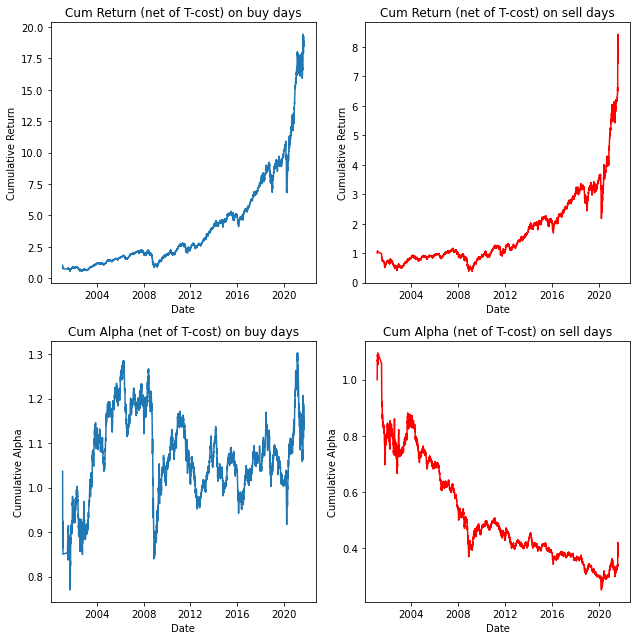

In [8]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.007
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.85e-06
Time:                        17:44:10   Log-Likelihood:                 13816.
No. Observations:                5079   AIC:                        -2.762e+04
Df Residuals:                    5072   BIC: 

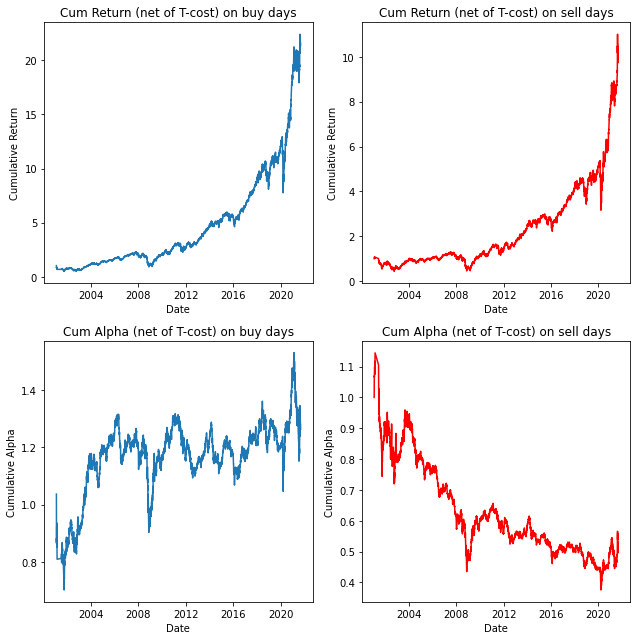

In [9]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.831
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.55e-06
Time:                        17:44:44   Log-Likelihood:                 13826.
No. Observations:                5089   AIC:                        -2.764e+04
Df Residuals:                    5082   BIC: 

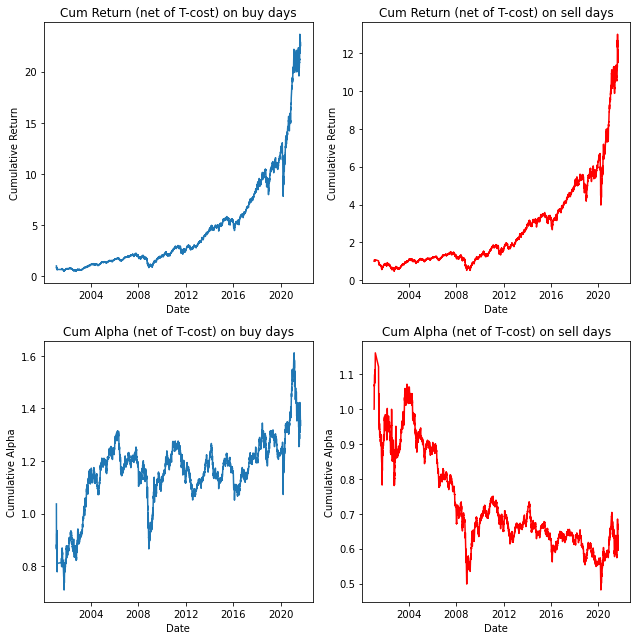

In [10]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the median estimate!

In [11]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetargetsmedian'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['pricetargetsmedian'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetargetsmedian'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  45049
Total number of Sells:  28990
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  45049
Total number of Sells:  28990

There are  11  problems for buying

There are  10  problems for selling
Total number of Buys:  550193
Total number of Sells:  381283

There are  10  problems for buying

There are  10  problems for selling
Total number of Buys:  452378
Total number of Sells:  308410

There are  5  problems for buying

There are  9  problems for selling
Total number of Buys:  335653
Total number of Sells:  224599

There are  4  problems for buying

There are  3  problems for selling
Total number of Buys:  192191
Total number of Sells:  125883

There are  0  problems for buying

There are  1  problems for selling
Total number of Buys:  45035
Total number of Sells:  28980



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     9.364
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.07e-10
Time:                        17:47:49   Log-Likelihood:                 12478.
No. Observations:                4912   AIC:                        -2.494e+04
Df Residuals:                    4905   BIC: 

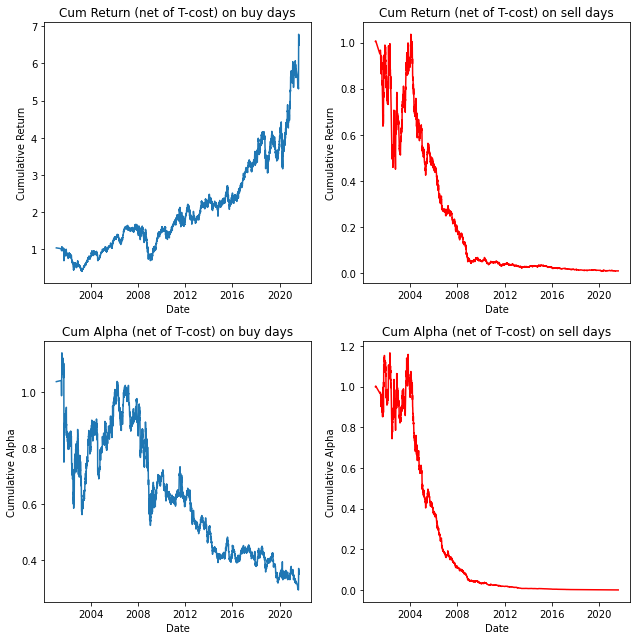

In [12]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.635
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.64e-06
Time:                        17:48:08   Log-Likelihood:                 13615.
No. Observations:                5043   AIC:                        -2.722e+04
Df Residuals:                    5036   BIC: 

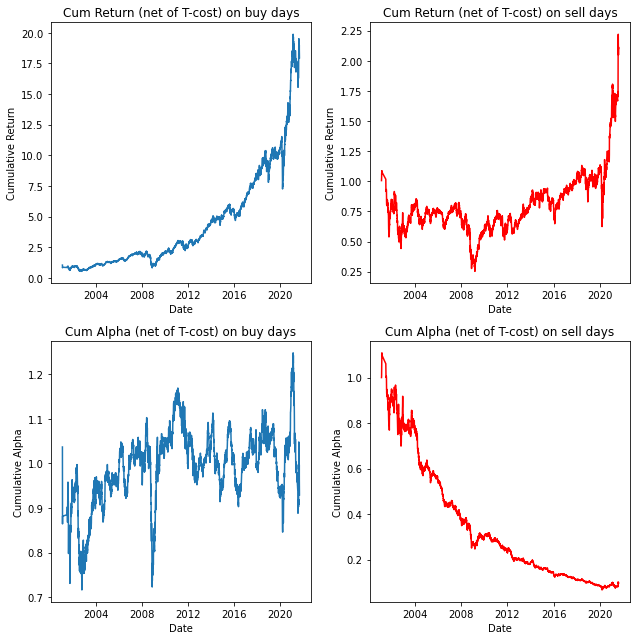

In [13]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.511
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.06e-05
Time:                        17:48:31   Log-Likelihood:                 13784.
No. Observations:                5066   AIC:                        -2.755e+04
Df Residuals:                    5059   BIC: 

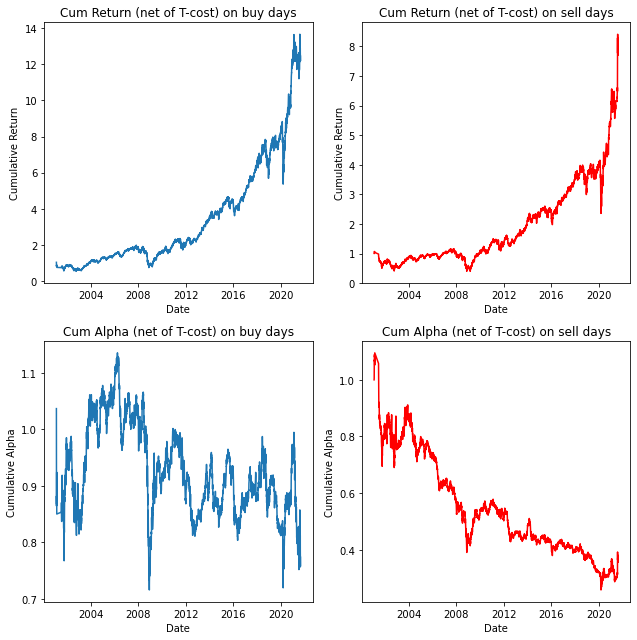

In [14]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.931
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.49e-06
Time:                        17:48:58   Log-Likelihood:                 13804.
No. Observations:                5079   AIC:                        -2.759e+04
Df Residuals:                    5072   BIC: 

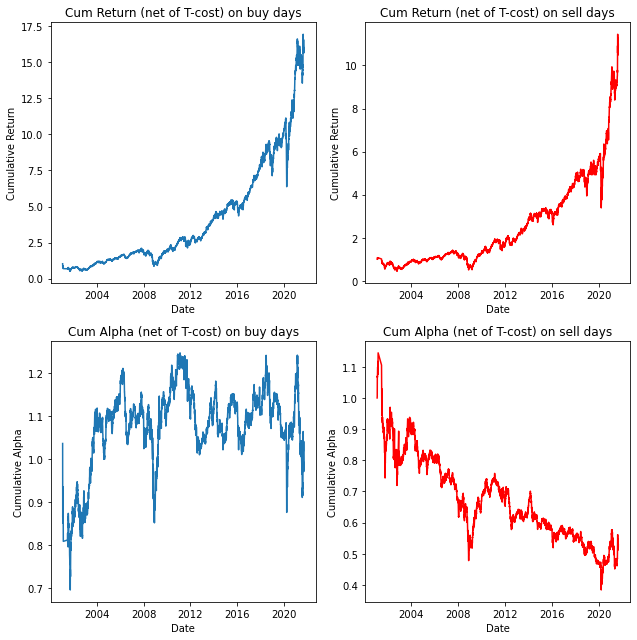

In [15]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.326
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.21e-06
Time:                        17:49:30   Log-Likelihood:                 13816.
No. Observations:                5089   AIC:                        -2.762e+04
Df Residuals:                    5082   BIC: 

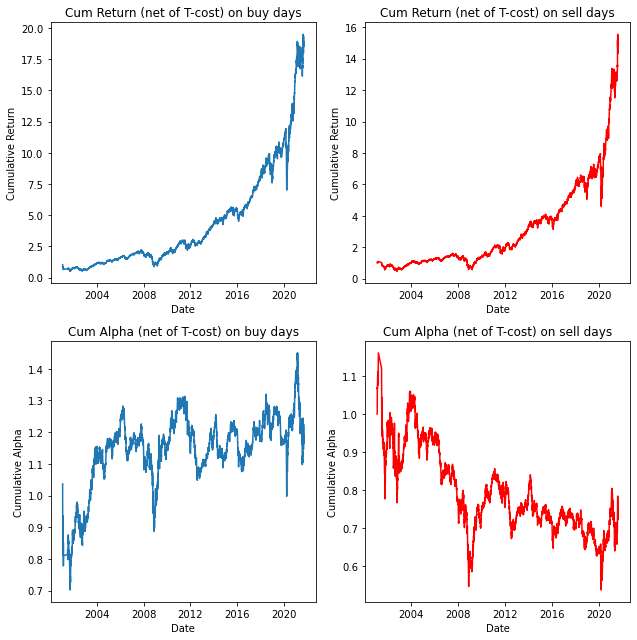

In [16]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the STD DEV of estimate!

In [17]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetargetsstandarddeviation'].notna()].reset_index(drop=True).copy()

#Buy when SD falls and there is no disagreement? Would that work? and why?
data['buy_tomorrow'] = np.where(data['pricetargetsstandarddeviation'].diff(1) < 0, 1, 0)
#Sell when SD rises and there is agreement? Would that work? and why?
data['sell_tomorrow'] = np.where(data['pricetargetsstandarddeviation'].diff(1) > 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  69367
Total number of Sells:  77541
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  9  problems for buying

There are  9  problems for selling
Total number of Buys:  69358
Total number of Sells:  77532

There are  70  problems for buying

There are  79  problems for selling
Total number of Buys:  730005
Total number of Sells:  748651

There are  57  problems for buying

There are  61  problems for selling
Total number of Buys:  618951
Total number of Sells:  641795

There are  36  problems for buying

There are  42  problems for selling
Total number of Buys:  475376
Total number of Sells:  500838

There are  23  problems for buying

There are  20  problems for selling
Total number of Buys:  283497
Total number of Sells:  306101

There are  0  problems for buying

There are  2  problems for selling
Total number of Buys:  69340
Total number of Sells:  77502



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.103
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.20e-06
Time:                        17:50:56   Log-Likelihood:                 12876.
No. Observations:                4986   AIC:                        -2.574e+04
Df Residuals:                    4979   BIC: 

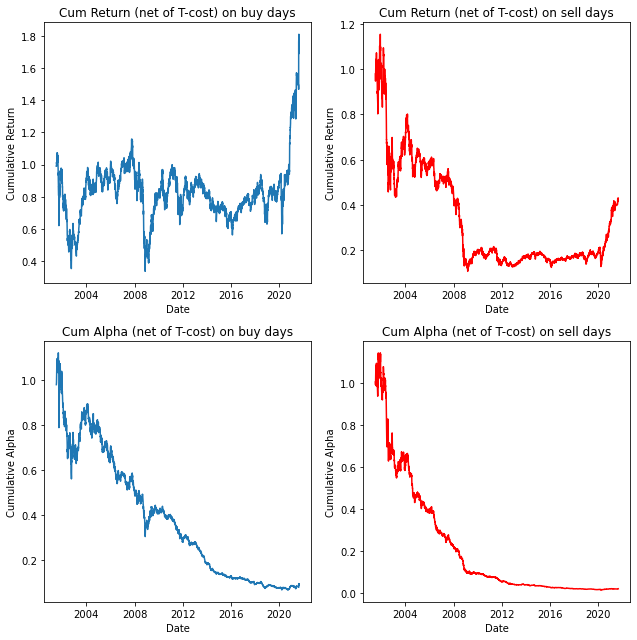

In [18]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.982
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.07e-07
Time:                        17:51:20   Log-Likelihood:                 13601.
No. Observations:                5043   AIC:                        -2.719e+04
Df Residuals:                    5036   BIC: 

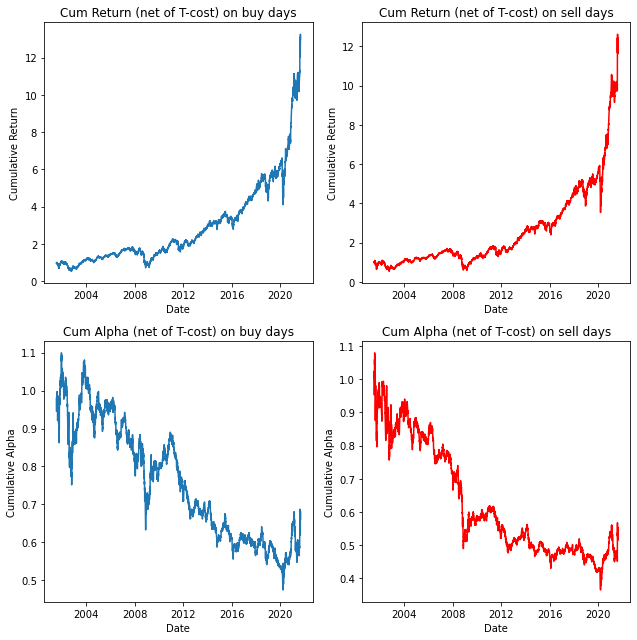

In [19]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.747
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.91e-07
Time:                        17:51:49   Log-Likelihood:                 13707.
No. Observations:                5054   AIC:                        -2.740e+04
Df Residuals:                    5047   BIC: 

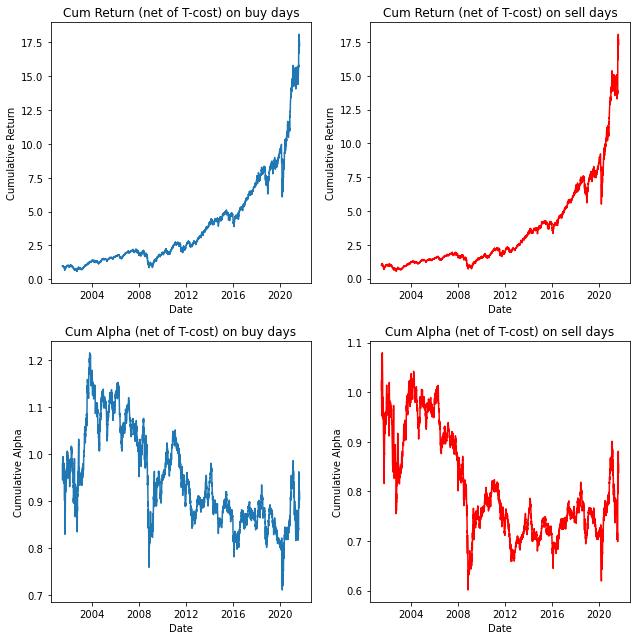

In [20]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.679
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.70e-07
Time:                        17:52:21   Log-Likelihood:                 13731.
No. Observations:                5059   AIC:                        -2.745e+04
Df Residuals:                    5052   BIC: 

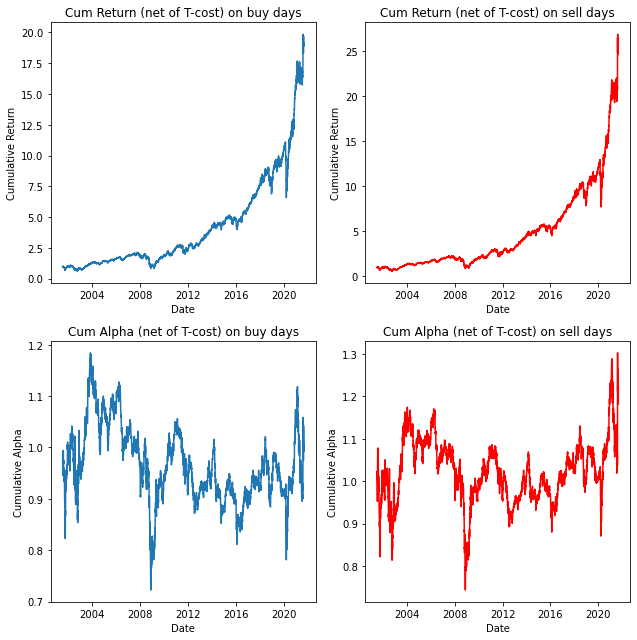

In [21]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.790
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.48e-07
Time:                        17:52:58   Log-Likelihood:                 13770.
No. Observations:                5064   AIC:                        -2.753e+04
Df Residuals:                    5057   BIC: 

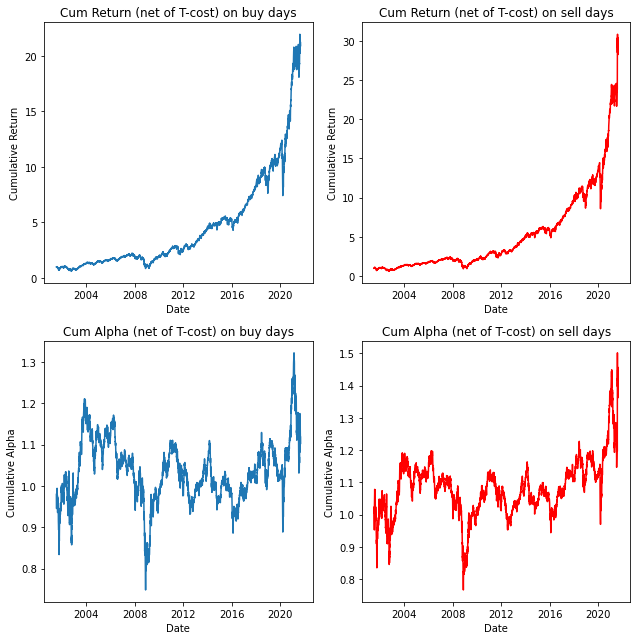

In [22]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in pricetargethigh

In [23]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetargethigh'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['pricetargethigh'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetargethigh'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  19726
Total number of Sells:  9668
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  19725
Total number of Sells:  9668

There are  6  problems for buying

There are  3  problems for selling
Total number of Buys:  311151
Total number of Sells:  167850

There are  6  problems for buying

There are  3  problems for selling
Total number of Buys:  245213
Total number of Sells:  129430

There are  3  problems for buying

There are  2  problems for selling
Total number of Buys:  172650
Total number of Sells:  88969

There are  2  problems for buying

There are  0  problems for selling
Total number of Buys:  92004
Total number of Sells:  46187

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  19717
Total number of Sells:  9665



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.761
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.61e-05
Time:                        17:54:07   Log-Likelihood:                 10743.
No. Observations:                4448   AIC:                        -2.147e+04
Df Residuals:                    4441   BIC: 

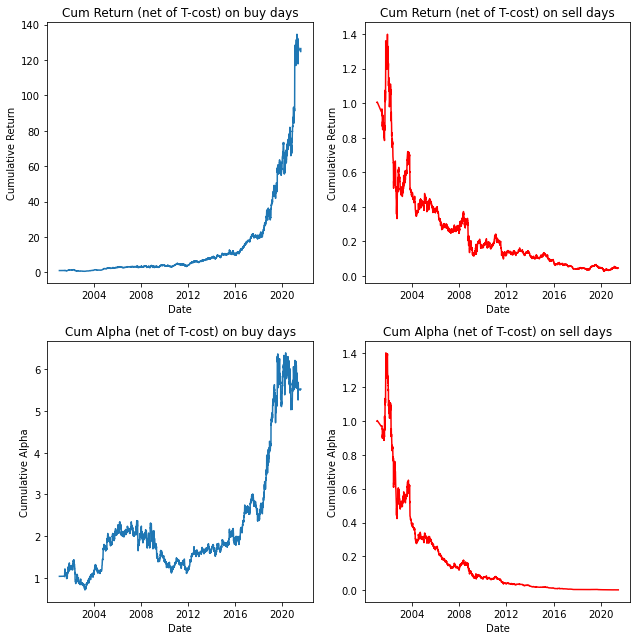

In [24]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.444
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00214
Time:                        17:54:22   Log-Likelihood:                 13202.
No. Observations:                5013   AIC:                        -2.639e+04
Df Residuals:                    5006   BIC: 

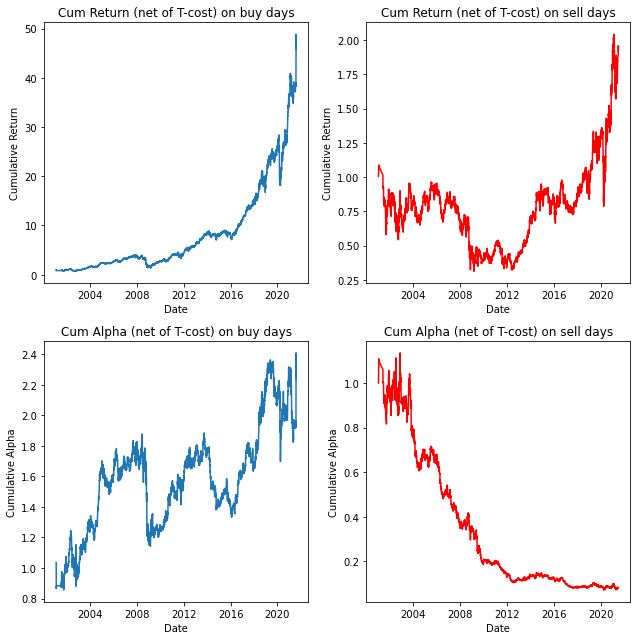

In [25]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.403
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.41e-05
Time:                        17:54:39   Log-Likelihood:                 13590.
No. Observations:                5040   AIC:                        -2.717e+04
Df Residuals:                    5033   BIC: 

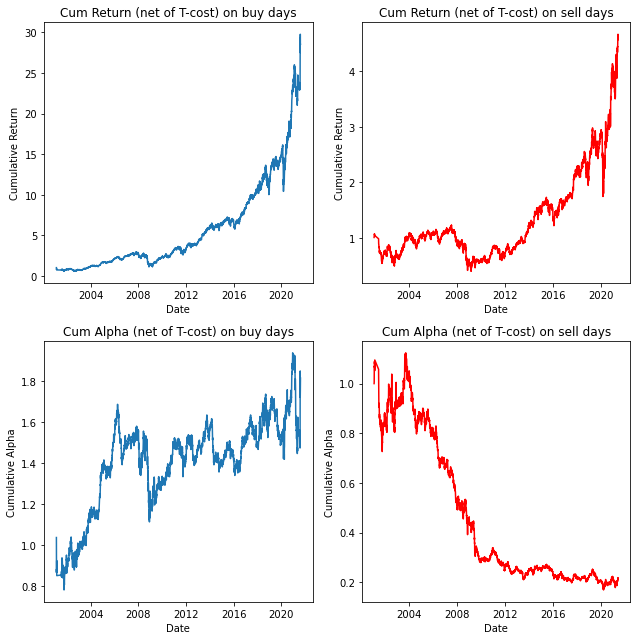

In [26]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.669
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.98e-06
Time:                        17:54:57   Log-Likelihood:                 13631.
No. Observations:                5059   AIC:                        -2.725e+04
Df Residuals:                    5052   BIC: 

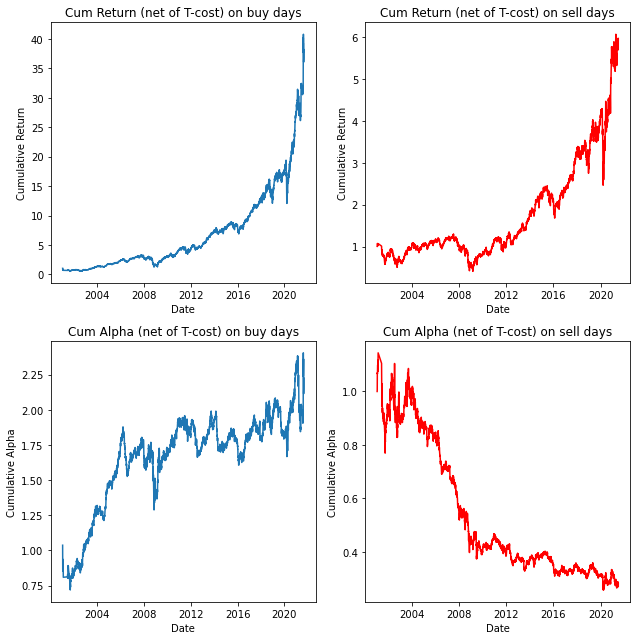

In [27]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.011
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.82e-06
Time:                        17:55:18   Log-Likelihood:                 13765.
No. Observations:                5074   AIC:                        -2.752e+04
Df Residuals:                    5067   BIC: 

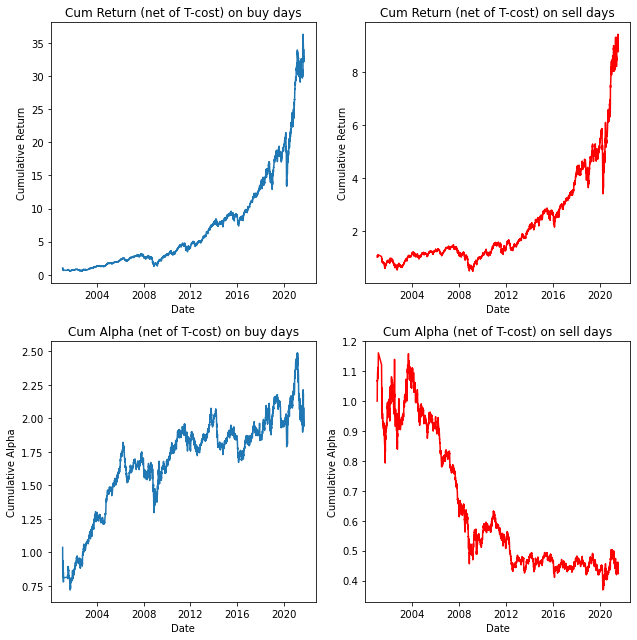

In [28]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in pricetargetlow

In [29]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetargetlow'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['pricetargetlow'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetargetlow'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  16581
Total number of Sells:  11513
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  16581
Total number of Sells:  11513

There are  6  problems for buying

There are  5  problems for selling
Total number of Buys:  288221
Total number of Sells:  191241

There are  4  problems for buying

There are  5  problems for selling
Total number of Buys:  222677
Total number of Sells:  148845

There are  3  problems for buying

There are  4  problems for selling
Total number of Buys:  153256
Total number of Sells:  103427

There are  1  problems for buying

There are  1  problems for selling
Total number of Buys:  79541
Total number of Sells:  54280

There are  0  problems for buying

There are  1  problems for selling
Total number of Buys:  16578
Total number of Sells:  11505



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.156
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0443
Time:                        17:56:30   Log-Likelihood:                 10407.
No. Observations:                4271   AIC:                        -2.080e+04
Df Residuals:                    4264   BIC: 

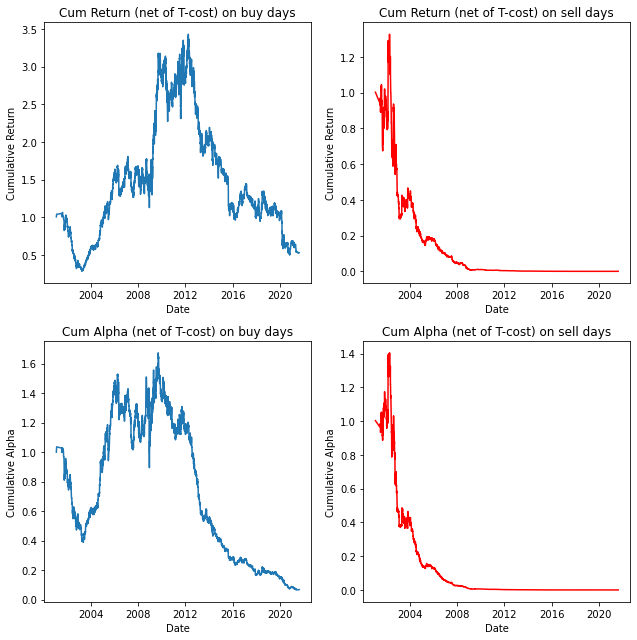

In [30]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.673
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           9.52e-05
Time:                        17:56:45   Log-Likelihood:                 13296.
No. Observations:                5026   AIC:                        -2.658e+04
Df Residuals:                    5019   BIC: 

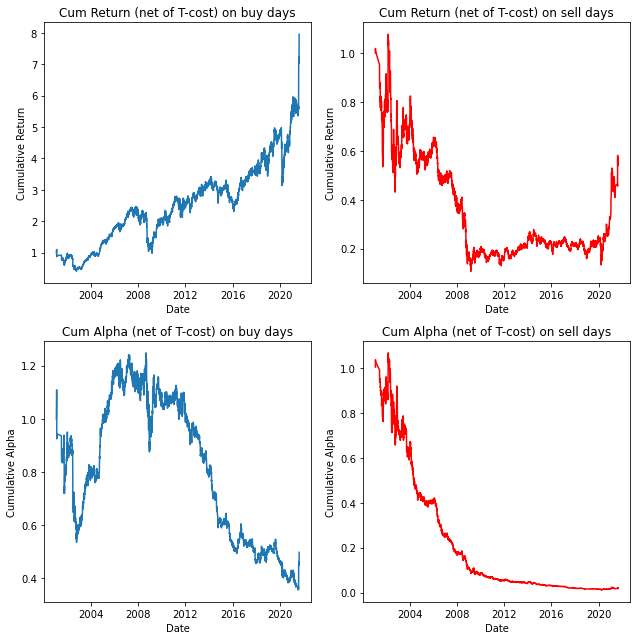

In [31]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.999
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.91e-06
Time:                        17:57:02   Log-Likelihood:                 13633.
No. Observations:                5061   AIC:                        -2.725e+04
Df Residuals:                    5054   BIC: 

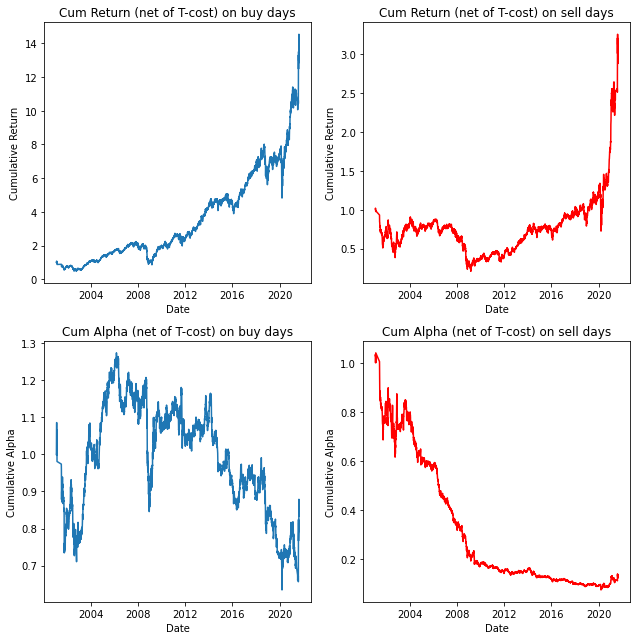

In [32]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.342
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.66e-05
Time:                        17:57:20   Log-Likelihood:                 13709.
No. Observations:                5077   AIC:                        -2.740e+04
Df Residuals:                    5070   BIC: 

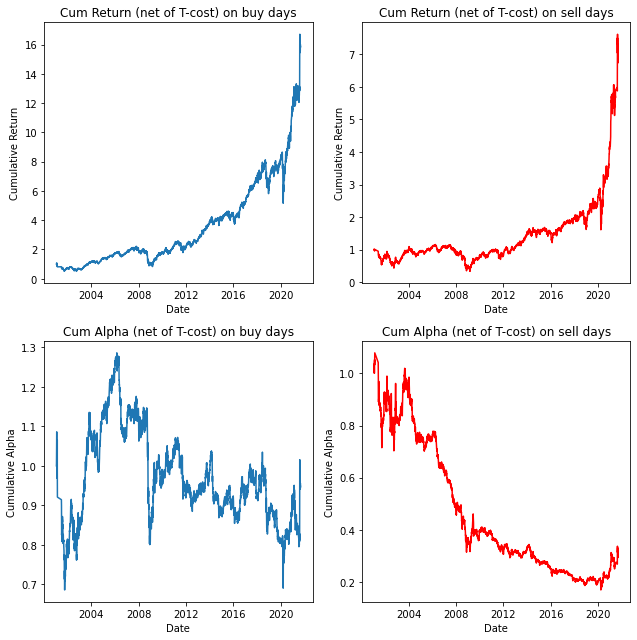

In [33]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.990
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.17e-05
Time:                        17:57:42   Log-Likelihood:                 13857.
No. Observations:                5087   AIC:                        -2.770e+04
Df Residuals:                    5080   BIC: 

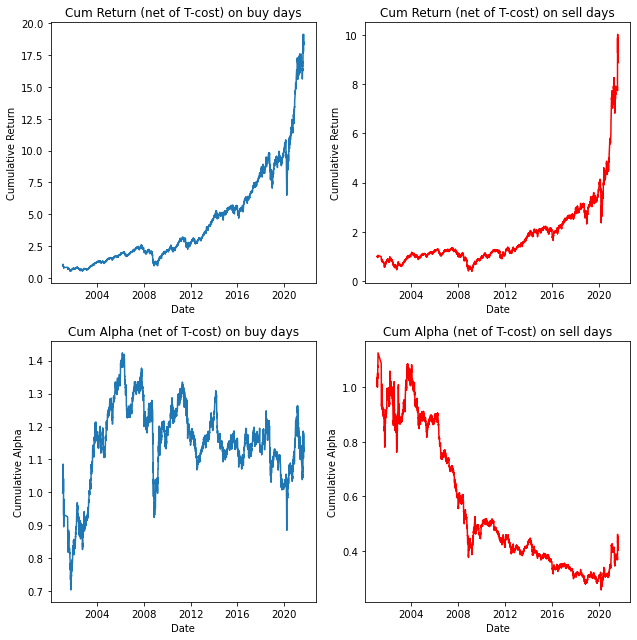

In [34]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in pricetarget
# Is this just similar to trading on when numpricetargetslowered>0 ?? NO it is not

In [35]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetarget'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['pricetarget'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetarget'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  78824
Total number of Sells:  53574
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  11  problems for buying

There are  0  problems for selling
Total number of Buys:  78813
Total number of Sells:  53574

There are  17  problems for buying

There are  17  problems for selling
Total number of Buys:  694363
Total number of Sells:  519749

There are  17  problems for buying

There are  12  problems for selling
Total number of Buys:  598798
Total number of Sells:  437592

There are  12  problems for buying

There are  8  problems for selling
Total number of Buys:  472107
Total number of Sells:  336238

There are  6  problems for buying

There are  3  problems for selling
Total number of Buys:  294558
Total number of Sells:  204233

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  78791
Total number of Sells:  53551



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.325
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.22e-06
Time:                        17:58:55   Log-Likelihood:                 11896.
No. Observations:                4732   AIC:                        -2.378e+04
Df Residuals:                    4725   BIC: 

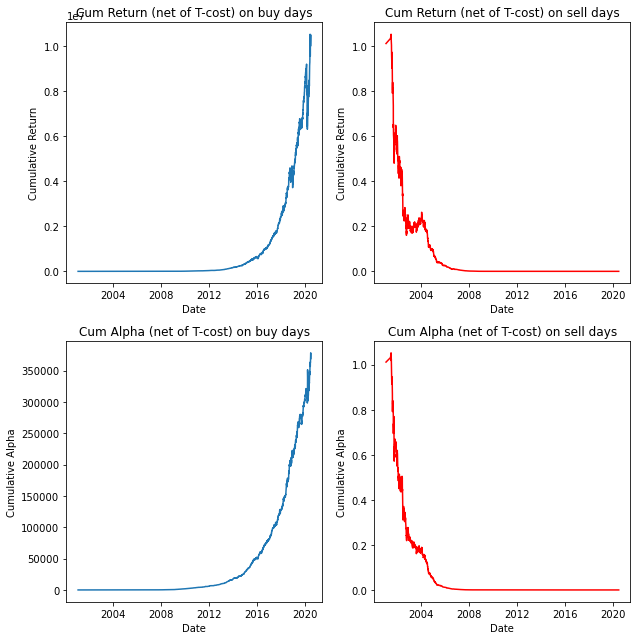

In [36]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.938
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.43e-06
Time:                        17:59:24   Log-Likelihood:                 13018.
No. Observations:                4779   AIC:                        -2.602e+04
Df Residuals:                    4772   BIC: 

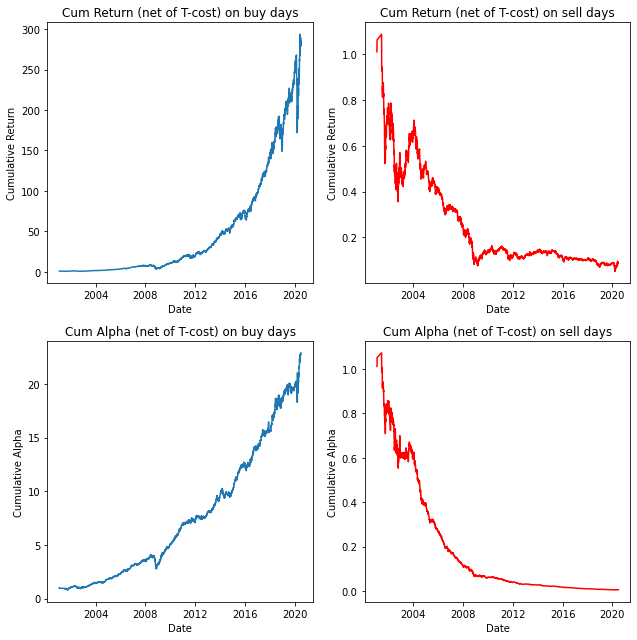

In [37]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.285
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.36e-06
Time:                        17:59:52   Log-Likelihood:                 13076.
No. Observations:                4784   AIC:                        -2.614e+04
Df Residuals:                    4777   BIC: 

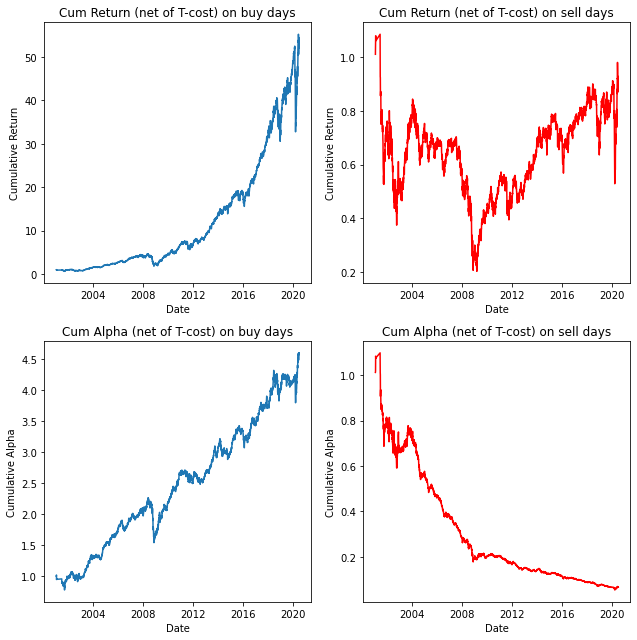

In [38]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.579
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           8.90e-06
Time:                        18:00:22   Log-Likelihood:                 13093.
No. Observations:                4789   AIC:                        -2.617e+04
Df Residuals:                    4782   BIC: 

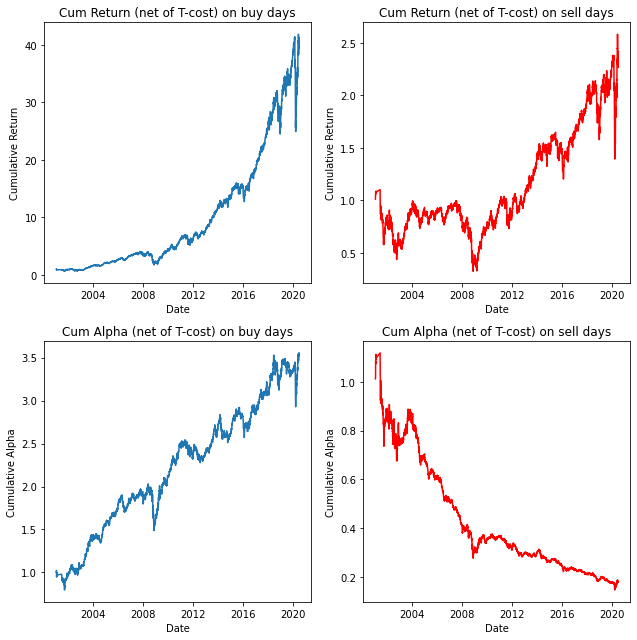

In [39]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.563
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           9.28e-06
Time:                        18:01:00   Log-Likelihood:                 13093.
No. Observations:                4794   AIC:                        -2.617e+04
Df Residuals:                    4787   BIC: 

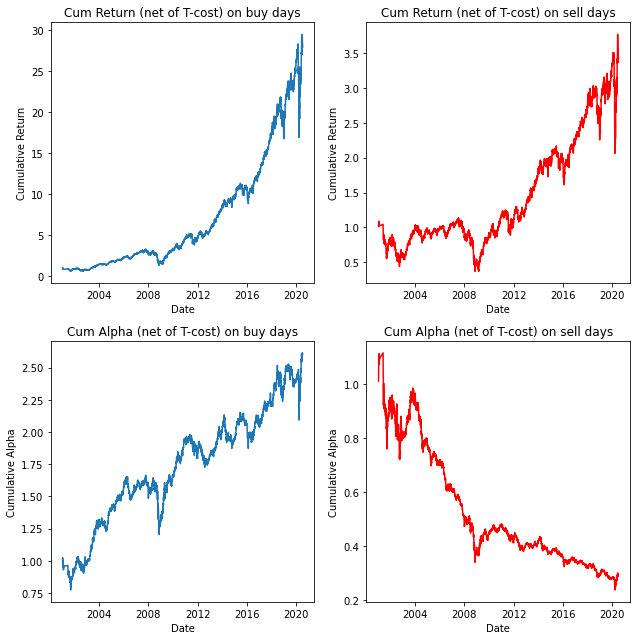

In [40]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)